In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Citibike_Data.csv')

In [2]:
#The dataset does not have an index column

#Creating the index range, by numbering first row 1 and then +1 after that
df['Index'] = range(1, len(df) + 1)
#Setting this new Index column as my df index
df.set_index('Index', inplace=True)


In [3]:
#Viewing the new df
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
Index,,,,,,,,,,,,,,,
1,695,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
2,693,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
3,2059,6/1/13 0:00,6/1/13 0:35,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
4,123,6/1/13 0:01,6/1/13 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
5,1521,6/1/13 0:01,6/1/13 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577699,925,6/30/13 23:59,7/1/13 0:14,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,15250,Subscriber,1964.0,1
577700,279,6/30/13 23:59,7/1/13 0:04,116,W 17 St & 8 Ave,40.741776,-74.001497,494.0,W 26 St & 8 Ave,40.747348,-73.997236,19411,Customer,NaN,0
577701,161,6/30/13 23:59,7/1/13 0:02,443,Bedford Ave & S 9 St,40.708531,-73.964090,282.0,Kent Ave & S 11 St,40.707645,-73.968415,18910,Subscriber,1972.0,2


In [4]:
#Understanding the Attribute types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577703 entries, 1 to 577703
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             577703 non-null  int64  
 1   starttime                577703 non-null  object 
 2   stoptime                 577703 non-null  object 
 3   start station id         577703 non-null  int64  
 4   start station name       577703 non-null  object 
 5   start station latitude   577703 non-null  float64
 6   start station longitude  577703 non-null  float64
 7   end station id           559644 non-null  float64
 8   end station name         559644 non-null  object 
 9   end station latitude     559644 non-null  float64
 10  end station longitude    559644 non-null  float64
 11  bikeid                   577703 non-null  int64  
 12  usertype                 577703 non-null  object 
 13  birth year               337382 non-null  float64
 14  gend

In [5]:
#Must change the Start and stop time to datetime fields
#Must change Birthyear to int

df['starttime']= pd.to_datetime(df['starttime'])
df['stoptime']= pd.to_datetime(df['stoptime'])
df["birth year"] = pd.to_numeric(df["birth year"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577703 entries, 1 to 577703
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             577703 non-null  int64         
 1   starttime                577703 non-null  datetime64[ns]
 2   stoptime                 577703 non-null  datetime64[ns]
 3   start station id         577703 non-null  int64         
 4   start station name       577703 non-null  object        
 5   start station latitude   577703 non-null  float64       
 6   start station longitude  577703 non-null  float64       
 7   end station id           559644 non-null  float64       
 8   end station name         559644 non-null  object        
 9   end station latitude     559644 non-null  float64       
 10  end station longitude    559644 non-null  float64       
 11  bikeid                   577703 non-null  int64         
 12  usertype        

In [6]:
#Creating a new field for Ride Duration (stoptime - starttime) in minutes
df["Ride Duration"] = df["stoptime"] - df["starttime"]
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Ride Duration
Index,,,,,,,,,,,,,,,,
1,695,2013-06-01 00:00:00,2013-06-01 00:11:00,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1,0 days 00:11:00
2,693,2013-06-01 00:00:00,2013-06-01 00:11:00,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1,0 days 00:11:00
3,2059,2013-06-01 00:00:00,2013-06-01 00:35:00,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0,0 days 00:35:00
4,123,2013-06-01 00:01:00,2013-06-01 00:03:00,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1,0 days 00:02:00
5,1521,2013-06-01 00:01:00,2013-06-01 00:26:00,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1,0 days 00:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577699,925,2013-06-30 23:59:00,2013-07-01 00:14:00,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,15250,Subscriber,1964.0,1,0 days 00:15:00
577700,279,2013-06-30 23:59:00,2013-07-01 00:04:00,116,W 17 St & 8 Ave,40.741776,-74.001497,494.0,W 26 St & 8 Ave,40.747348,-73.997236,19411,Customer,NaN,0,0 days 00:05:00
577701,161,2013-06-30 23:59:00,2013-07-01 00:02:00,443,Bedford Ave & S 9 St,40.708531,-73.964090,282.0,Kent Ave & S 11 St,40.707645,-73.968415,18910,Subscriber,1972.0,2,0 days 00:03:00


In [7]:
#Look for Null Values 
df.isnull().sum().sum()
df['birth year'].isnull().sum()

#Most null values occur in the Birthyear column


240321

In [8]:
#Demographic Understanding 
#Users by Gender (0-not known, 1 - Male, 2-Female)
df.groupby('gender').size()

#Users by Usertype (Subscriber vs. General Customer)
df.groupby('usertype').size()

usertype
Customer      240319
Subscriber    337384
dtype: int64

Text(0, 0.5, 'Frequency')

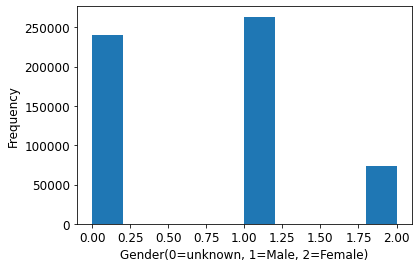

In [10]:
#Gender Histogram 
df['gender'].hist(grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Gender(0=unknown, 1=Male, 2=Female)", fontsize=12)
plt.ylabel("Frequency",fontsize=12)


Text(0, 0.5, 'Frequency')

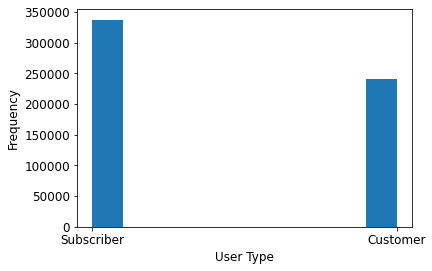

In [11]:
#Usertype Histogram
df['usertype'].hist(grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("User Type", fontsize=12)
plt.ylabel("Frequency",fontsize=12)

In [12]:
#Average Age of Data set

#Cleaning NANs in Birthyear column 

df1 = df[['birth year']].copy()

#Filtering out Values where Birth year is not NA
df1 = df1[df1['birth year'].notna()]

#Finding average of the Column 
df1 = df1["birth year"].mean()
df1

#Average year born for those who have listed there birth year is 1974 making the average user age = (2013 - 1974) = 39

1974.6449454920535

In [13]:
#Creating a new Age column to validate Average age 
df["Age"] = 2013 - df["birth year"]
mean = df["Age"].mean()
mean

#New age Column validates last finding

38.355054507946484

In [14]:
#Creating an analysis to analyze most frequent start and stop points 
start = df[['start station name']].copy()
end = df[[ 'end station name']].copy()
df2 = start.append(end)
df2.fillna('', inplace=True)
df2

,start station name,end station name
Index,,
1,Broadway & W 24 St,
2,Broadway & W 24 St,
3,Hicks St & Montague St,
4,E 15 St & Irving Pl,
5,Little West St & 1 Pl,
...,...,...
577699,,W 22 St & 10 Ave
577700,,W 26 St & 8 Ave
577701,,Kent Ave & S 11 St


In [19]:
#Most frequent start station
df4 = df2.groupby('start station name').size()
df4.sort_values(ascending=False)
#Most Frequent start station is 1 Ave & E 16 St

start station name
                               577703
W 20 St & 11 Ave                 5983
E 17 St & Broadway               5621
Broadway & W 58 St               5401
Broadway & E 14 St               5177
                                ...  
Hanover Pl & Livingston St        148
DeKalb Ave & Vanderbilt Ave       129
Park Ave & St Edwards St           89
DeKalb Ave & Skillman St           57
MLSWKiosk                           2
Length: 338, dtype: int64

In [18]:
#Most frequent end station
df3 = df2.groupby('end station name').size()
#Most Frequent end station is 1 Ave & E 16 St
df3.sort_values(ascending=False)

end station name
                               595762
W 20 St & 11 Ave                 5742
E 17 St & Broadway               5530
Broadway & W 58 St               5308
Central Park S & 6 Ave           5290
                                ...  
Hanover Pl & Livingston St        140
DeKalb Ave & Vanderbilt Ave       116
DeKalb Ave & Skillman St           90
Park Ave & St Edwards St           82
MLSWKiosk                           2
Length: 338, dtype: int64

In [20]:
#Combining all Start and end stops into one column to see most visited stops all time
df2["all"] = df2["start station name"].astype(str) + df2["end station name"].astype(str)
All = df2[['all']]
All["Visit"] = '1'
All["id"] = range(1, len(All) + 1)
All["Visit"] = All['Visit'].astype(str).astype(int)
All.info()
All

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155406 entries, 1 to 577703
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   all     1155406 non-null  object
 1   Visit   1155406 non-null  int64 
 2   id      1155406 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 35.3+ MB


/var/folders/pj/8v7ylflx45qdjdbckj_7sfbw0000gn/T/ipykernel_8374/716235459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All["Visit"] = '1'


,all,Visit,id
Index,,,
1,Broadway & W 24 St,1,1
2,Broadway & W 24 St,1,2
3,Hicks St & Montague St,1,3
4,E 15 St & Irving Pl,1,4
5,Little West St & 1 Pl,1,5
...,...,...,...
577699,W 22 St & 10 Ave,1,1155402
577700,W 26 St & 8 Ave,1,1155403
577701,Kent Ave & S 11 St,1,1155404


In [21]:
#most common stops in the whole data set 
All.groupby('all').size()

all
                                18059
1 Ave & E 16 St                  4660
1 Ave & E 18 St                  3326
1 Ave & E 30 St                  3281
1 Ave & E 44 St                  3457
                                ...  
Willoughby Ave & Hall St         1128
Willoughby Ave & Walworth St     1015
Willoughby St & Fleet St          834
Wythe Ave & Metropolitan Ave     2908
York St & Jay St                 3347
Length: 338, dtype: int64

<AxesSubplot:>

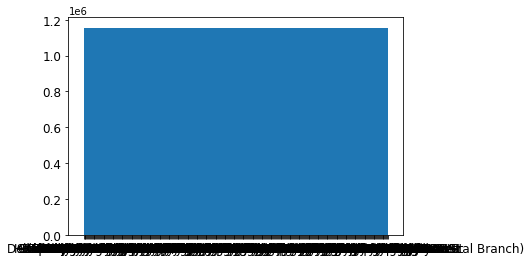

In [22]:
All['all'].hist(bins=1, grid=False, xlabelsize=12, ylabelsize=12)


In [ ]:
#Exporting my manipulated dataframe to excel to be plugged into tableau 
df.to_excel(r'/Users/siva/Documents/Helathfirst Documents/HF Analytics Course /Capstone/Final.xlsx', index = True, header = True)

#Rest of the Analysis (including Visualizations) areS Included in Tableau and Powerpoint